<a href="https://colab.research.google.com/github/JoseLuiz432/Credit-risk/blob/main/Credit_Risk_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Evaluate

This Colab is an example of how to use Neural Network to evaluate the credit risk.

For this example I'm using the Kaggle Dataset avaible [Here](https://www.kaggle.com/laotse/credit-risk-dataset).



## The problem
Credit Risk Evaluate is an important task that try to mensure the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations. 

## Table of contents

0.   Environment setting
1.   Dataset description
2.   Dataset preprocessing
3.   Machine Learning Models
4.   Results
5.   Conclusion



# Environment Setting

In [1]:
# Import librarys I'll need.
# Pandas to store and view the dataset
import pandas as pd
# Matplotlib to plot charts and grafics
import matplotlib.pyplot as plt
# Numpy for data manipulation
import numpy as np

In [2]:
!wget https://github.com/JoseLuiz432/Credit-risk/raw/main/dataset/credit_risk_dataset.csv

--2022-01-19 16:30:06--  https://github.com/JoseLuiz432/Credit-risk/raw/main/dataset/credit_risk_dataset.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoseLuiz432/Credit-risk/main/dataset/credit_risk_dataset.csv [following]
--2022-01-19 16:30:07--  https://raw.githubusercontent.com/JoseLuiz432/Credit-risk/main/dataset/credit_risk_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1804682 (1.7M) [text/plain]
Saving to: ‘credit_risk_dataset.csv’

credit_risk_dataset 100%[===================>]   1.72M  --.-KB/s    in 0.03s   

2022-01-19 16:30:07 (51.8 MB/s) - ‘credit_risk_datase

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

# Dataset Description

In [4]:
%load_ext google.colab.data_table
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


There are 11 features for each sample in this dataset. Each feature are described bellow:



*  [person_age] - is the years old of the sample
*  [person_income] - is the year income
*  [person_home_ownership] - Home ownership
*  [person_emp_length] - Employment length (in years)
*  [loan_intent] - Loan intent
*  [loan_grade] - Loan grade
*  [loan_amnt]  - Loan amount
*  [loan_int_rate] - Interest rate
*  [loan_percent_income] - Percent income on loan
*  [cb_person_default_on_file] - Historical default loan
*  [cb_person_cred_hist_length] -  Credit history length

And the target value Loan grade
* [loan_grade] - Loan grade

In [5]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

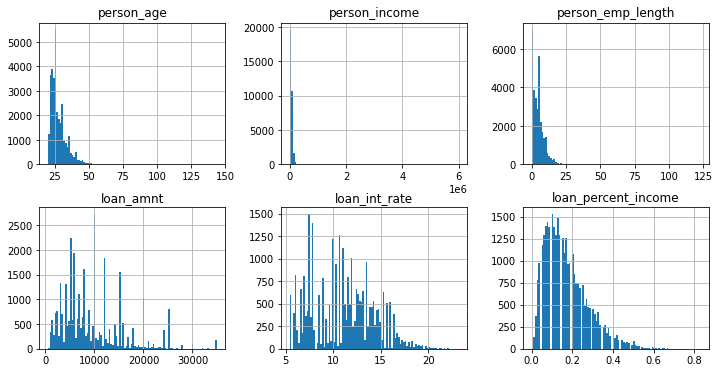

In [26]:
df_in = df[['person_age','person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']]
fig, axes = plt.subplots(len(df_in.columns)//3, 3, figsize=(12, 6))

i = 0
for triaxis in axes:
    for axis in triaxis:
        
        df_in.hist(column = df_in.columns[i], bins = 100, ax=axis,)
        i = i+1

## Análisar os dados

  - 1) Verificar os tipos
  - 2) Remover colunas não significativas
  - 3) Remover outliers  


In [6]:
print("\nValores Ausentes:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Ausentes:
loan_int_rate                 0.095639
person_emp_length             0.027470
cb_person_cred_hist_length    0.000000
cb_person_default_on_file     0.000000
loan_percent_income           0.000000
loan_status                   0.000000
loan_amnt                     0.000000
loan_grade                    0.000000
loan_intent                   0.000000
person_home_ownership         0.000000
person_income                 0.000000
person_age                    0.000000
dtype: float64


In [7]:
# Valores Únicos
print("\nValores Únicos:")
print(df.nunique().sort_values())


Valores Únicos:
loan_status                      2
cb_person_default_on_file        2
person_home_ownership            4
loan_intent                      6
loan_grade                       7
cb_person_cred_hist_length      29
person_emp_length               36
person_age                      58
loan_percent_income             77
loan_int_rate                  348
loan_amnt                      753
person_income                 4295
dtype: int64


In [9]:
# ver resumo estatístico dos dados numéricos
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Manipulação dos dados
 - 1) substituir valores inf por 'NaN' da coluna reported_income
 - 2) Substituir o valor -999 em 'external_data_provider_email_seen_before' por 'NaN'
 - 3) Eliminar as colunas sem informação aparente ou que demandam mais pesquisa

In [ ]:
# Substituindo
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

In [ ]:
# Eliminando as colunas sem informação aparente ou que demandam mais pesquisa

# Variável temporária para armazenar o label das colunas a serem eliminadas
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'shipping_state', 'target_fraud', 'ids', 'score_1', 'score_2', 'state', 'real_state']

# Comando para eliminar as colunas            
df_clean.drop(labels=drop_var, axis=1, inplace=True)

In [ ]:
# Eliminar as linhas com valores nulos (NaN) para a coluna target_default
df_clean.dropna(subset=['target_default'], inplace=True)

In [ ]:
# substituição de valores ausentes confome item 2 de nossa análise anterior
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

In [ ]:
# Importando a biblioteca para substituição dos valores conforme definido acima no item 4
from sklearn.impute import SimpleImputer

# Atribuindo os labels das colunas númericas a uma variável
num_df = df_clean.select_dtypes(exclude='object').columns

# Atribuindo os labels das colunas categórcias a uma variável
cat_df = df_clean.select_dtypes(include='object').columns

In [ ]:
# substituindo as variáveis categóricas pelos valores mais frequentes conforme definido acima no item 4
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

In [ ]:
# substituindo as variáveis numéricas pela mediana conforme definido acima no item 3
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

In [ ]:
df_train, df_test = train_test_split(df_clean, test_size=0.1)
df_train, df_val = train_test_split(df_train, test_size=0.2)

In [ ]:
df_test

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
35596,False,390.0,100.289495,0.431942,95.266545,0.31,0.00,0.0,134531.0,240026.11,True,70.0,0.0,0.0,15.0,15.0,353.0,0.0,0.0,56.0,771.0,141635.0
2366,False,290.0,97.209848,0.078579,98.285953,0.27,16019.43,36.0,26872.0,67016.85,True,32.0,0.0,0.0,11.0,11.0,175.0,0.0,2.0,-1.0,42.0,41099.0
8744,False,370.0,96.196687,0.224297,93.432504,0.29,0.00,0.0,45898.0,65008.46,False,23.0,0.0,0.0,9.0,9.0,250.0,0.0,1.0,53.0,914.0,179112.0
25870,False,390.0,99.888951,0.223489,96.401889,0.19,0.00,0.0,39896.0,57293.00,False,32.0,0.0,0.0,10.0,10.0,261.0,0.0,1.0,26.0,807.0,193142.0
1670,True,300.0,96.273920,0.327955,110.571536,0.27,0.00,0.0,25213.0,43013.50,False,32.0,0.0,0.0,6.0,0.0,173.0,0.0,1.0,30.0,875.0,28958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,False,530.0,98.610134,0.541735,110.975577,0.43,0.00,0.0,25213.0,31226.27,False,32.0,0.0,0.0,6.0,0.0,52.0,0.0,2.0,5.0,917.0,104450.0
41180,False,320.0,99.700141,0.541608,94.572560,0.18,0.00,0.0,32000.0,77019.78,False,32.0,0.0,0.0,10.0,10.0,257.0,0.0,2.0,7.0,848.0,82142.0
25120,False,360.0,98.842463,0.885751,90.881093,0.28,8016.41,36.0,26301.0,42008.04,True,46.0,0.0,0.0,8.0,8.0,382.0,0.0,3.0,8.0,475.0,172501.0
32538,False,440.0,100.350988,0.731504,93.916315,0.37,0.00,0.0,5000.0,50015.16,True,23.0,0.0,0.0,12.0,12.0,441.0,0.0,0.0,59.0,237.0,26245.0


# Modelo ML

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
def preprocessing(dataframe, default_dict_label):
  # normalizando as colunas numéricas
  num_cols = dataframe.drop('target_default',
                          axis=1).select_dtypes(exclude='object').columns

  dataframe[num_cols] = StandardScaler().fit_transform(dataframe[num_cols].values)
  encoded_df = dataframe.copy()
  cat_cols = encoded_df.select_dtypes('object').columns
  # Encoding the variable
  encoded_df[cat_cols] = encoded_df[cat_cols].apply(lambda x: default_dict_label[x.name].fit_transform(x))
  X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
  y = encoded_df['target_default']
  return X, y

def preprocessing2(dataframe, default_dict_label):
  cat_cols = dataframe.select_dtypes('object').columns
  if len(cat_cols) > 0:
    # Encoding the variable
    dataframe[cat_cols] = dataframe[cat_cols].apply(lambda x: default_dict_label[x.name].fit_transform(x))

  X = dataframe.drop('target_default', axis=1).select_dtypes(exclude='object')
  y = dataframe['target_default']
  X = X.apply(pd.to_numeric)
  y = y.apply(pd.to_numeric)
  return X.astype('float32'), y.astype('float32')

In [ ]:
# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# # Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))

In [ ]:
scaled_df_train = df_train.copy()
scaled_df_test = df_test.copy()
scaled_df_val = df_val.copy()
d = defaultdict(LabelEncoder)
X_train, y_train = preprocessing2(scaled_df_train, d)
X_test, y_test = preprocessing2(scaled_df_test, d)
X_val, y_val = preprocessing2(scaled_df_val, d)

In [ ]:
mlp = MLPClassifier(
    (100),max_iter=300, verbose=False, solver='adam', learning_rate_init=1e-4
)
clf = make_pipeline(StandardScaler(), mlp, verbose=False)
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=100,
                               learning_rate_init=0.0001, max_iter=300))])

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

0.8411752961533342
0.8393665158371041


In [ ]:
print(clf.score(X_test, y_test))

0.8407185628742515


In [ ]:
print(X_train)

       score_3     score_4  ...  external_data_provider_fraud_score  reported_income
31470    420.0  100.089788  ...                               659.0          49856.0
22841    380.0  100.881777  ...                               235.0         160243.0
4973      70.0  102.234920  ...                               104.0           7078.0
12698    390.0  101.666820  ...                               682.0         115061.0
874      320.0   97.606224  ...                               273.0            961.0
...        ...         ...  ...                                 ...              ...
1261     410.0   97.405279  ...                               125.0          66639.0
13479    260.0   98.132238  ...                               169.0          99305.0
44908    420.0   98.928279  ...                               528.0         193040.0
3689     260.0   98.691457  ...                               367.0          10685.0
40730    270.0   98.888929  ...                               239

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


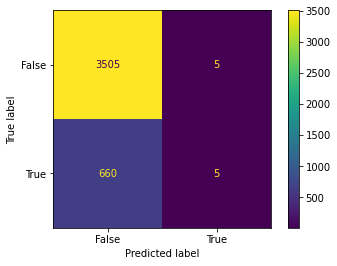

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [ ]:
print(X_train.shape)

(30052, 21)


In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(21, 100),
      nn.ReLU(),
      nn.BatchNorm1d(100),
      nn.Linear(100, 64),
      nn.ReLU(),
      nn.BatchNorm1d(64),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
scaler = StandardScaler()
X_train = torch.from_numpy(scaler.fit_transform(X_train.to_numpy()))
y_train = torch.from_numpy(y_train.to_numpy())

In [ ]:
dataset = TensorDataset(X_train, y_train)

In [ ]:
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

In [ ]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.BCEWithLogitsLoss(torch.from_numpy(np.array([100])))
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
# Run the training loop
for epoch in range(0, 50):
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get inputs
      inputs, targets = data
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      targets = targets.unsqueeze(1)
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 39.615
Loss after mini-batch  1000: 39.394
Loss after mini-batch  1500: 38.863
Loss after mini-batch  2000: 41.186
Loss after mini-batch  2500: 41.669
Loss after mini-batch  3000: 41.791
Starting epoch 2
Loss after mini-batch   500: 39.642
Loss after mini-batch  1000: 40.347
Loss after mini-batch  1500: 40.553
Loss after mini-batch  2000: 38.864
Loss after mini-batch  2500: 40.047
Loss after mini-batch  3000: 40.959
Starting epoch 3
Loss after mini-batch   500: 39.827
Loss after mini-batch  1000: 39.754
Loss after mini-batch  1500: 39.038
Loss after mini-batch  2000: 39.305
Loss after mini-batch  2500: 41.207
Loss after mini-batch  3000: 39.871
Starting epoch 4
Loss after mini-batch   500: 39.303
Loss after mini-batch  1000: 40.510
Loss after mini-batch  1500: 40.178
Loss after mini-batch  2000: 39.792
Loss after mini-batch  2500: 39.427
Loss after mini-batch  3000: 38.368
Starting epoch 5
Loss after mini-batch   500: 39.312
Loss after mini

In [ ]:
X_val = torch.from_numpy(scaler.fit_transform(X_val.to_numpy()))
y_val = torch.from_numpy(y_val.to_numpy())

In [ ]:
dataset_val = TensorDataset(X_val, y_val)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mlp.to(device)


MLP(
  (layers): Sequential(
    (0): Linear(in_features=21, out_features=100, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=100, out_features=64, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
y_pred_list = []
y_true_lis = []
mlp.eval()
with torch.no_grad():
    for i, data in enumerate(trainloader, 0):
        X_batch, targets = data
        X_batch = X_batch.to(device)
        y_test_pred = mlp(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.where(y_test_pred > 0.3, 1, 0)
        y_pred_list += np.squeeze(y_pred_tag.cpu().numpy()).tolist()
        y_true_lis  += np.squeeze(targets.cpu().numpy()).tolist()



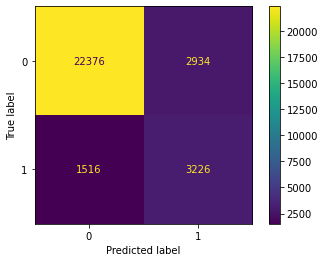

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_true_lis, y_pred_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_true_lis, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     25310
         1.0       0.63      0.55      0.59      4742

    accuracy                           0.88     30052
   macro avg       0.77      0.75      0.76     30052
weighted avg       0.87      0.88      0.87     30052

